In [2]:
%matplotlib inline

import numpy as np
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
import h5py
import math
import os, sys
%load_ext autoreload
%autoreload 2
sys.path.append('/palmyra/data/jingmingruan/dataprocessing')
# sys.path.append('/home/jingmingruan/TUD/DeepNL/cloud/dataprocessing')
from plot_Zeerijp import *

The moment magnitude Mw of a seismic event is determined from the Relative Slip Displacement (RSD) along the fault plane at the end of the seismic rupture according to

# $\mathrm{M}_w=\frac{2}{3}\left(\log M_0-9.1\right)$
# $M_0=\int_{A_{s l i p}} \mu \mathrm{d} \mathrm{dA}=\mathrm{w} \cdot\left\{\sum_e \mu_e \cdot \mathrm{RSD}_e \cdot l_e\right\}$

Herein, d is the average slip displacement over the slip patch with area Aslip and µ the shear modulus. The seismic moment M0 is calculated from the finite-element analysis results by summation of the Relative Slip Displacement RSDe over all slipping interface elements with length le and shear modulus µe. That is, RSDe is the incremental slip displacement calculated during the dynamic rupture simulation (analysis stage 2), and excludes the slip displacement calculated as a result of reservoir depletion (analysis stage 1).

# $    \frac{L_{n u c}}{D_c}=\sqrt{\frac{3.82 \pi}{4}} \frac{\mu}{\sigma_n^{\prime}\left(\mu_s-\mu_r\right)} .$

Analytical expression of a critical aseismic slip patch length

In [2]:
# G (mu)
# G = E / (2 * (1 + ν))
G = 15.0 / (2 * (1 + 0.20))
print (G)

6.25


In [3]:
L_nuc = 0.01*np.sqrt(3.82*3.14/4)*(6.25*1e9/(0.15*20e6)) # effective stress is change a lot for offset region\
L_nuc_d = 0.01*np.sqrt(3.82*3.14/4)*(6.25*1e9*2/(0.15*20e6)) # effective stress is change a lot for offset region\
print (L_nuc)
print (L_nuc_d)

36.07657269229191
72.15314538458382


In [4]:
L_nuc = 0.01*np.sqrt(3.82*3.14/4)*(6*1e9/(0.15*30e6)) # effective stress is change a lot for offset region\
print (L_nuc)

23.08900652306682


# Load data

In [3]:
dyn = 1
seis = 0
vline = 1.0
axis = 1
mask = 0.6
delta = 0
xyaxis = 0
projection=True
vline = 0.8
# Zeerijp = plot3D("./Zeerijp/run05/Zeerijp_fe_040302.h5",dyn=dyn,seis=seis) # 
# tri_file = "./Zeerijp/run05/flt_tri_nob.npy" # "./Zeerijp/flt_tri_nob.npy" "./Buijze3D_offset/flt_tri_nob.npy"

# Zeerijp = plot3D("/media/jingmingruan/BACKUP/TUD/texel/3D_models/3D_mfvaryoffset/intersect_angle/run/30/Buijze3D_fe.h5",dyn=dyn,seis=seis) # 
# tri_file = "/media/jingmingruan/BACKUP/TUD/texel/3D_models/3D_mfvaryoffset/intersect_angle/run/30/flt_tri_nob.npy" # "./Zeerijp/flt_tri_nob.npy" "./Buijze3D_offset/flt_tri_nob.npy"

# Zeerijp = plot3D("./3D_mf/60_30/Buijze3D_fe.h5",dyn=dyn,seis=seis) # 
# tri_file = "./3D_mf/60_30/flt_tri_nob.npy" # "./Zeerijp/flt_tri_nob.npy" "./Buijze3D_offset/flt_tri_nob.npy"

# Zeerijp = plot3D("./Buijze3D_MT/run04_morestrike/Buijze3D_fe.h5",dyn=dyn,seis=seis) # 
# tri_file = "./Buijze3D_MT/run04_morestrike/flt_tri_nob.npy" # "./Zeerijp/flt_tri_nob.npy" "./Buijze3D_offset/flt_tri_nob.npy"

Zeerijp = plot3D("/palmyra/data/jingmingruan/models/3D/Zeerijp3D_anhydrite/4m/01_musdc/Zeerijp_fe.h5",dyn=dyn,seis=seis) # 
tri_file = "/palmyra/data/jingmingruan/models/3D/Zeerijp3D_anhydrite/4m/01_mus/flt_tri_nob.npy" # "./Zeerijp/flt_tri_nob.npy" "./Buijze3D_offset/flt_tri_nob.npy"


# Zeerijp = plot3D("./Zeerijp_anhydrite/6m/run04_06045001/Zeerijp_fe.h5",dyn=dyn,seis=seis) # 
# tri_file = "./Zeerijp_anhydrite/6m/run04_06045001/flt_tri_nob.npy" # "./Zeerijp/flt_tri_nob.npy" "./Buijze3D_offset/flt_tri_nob.npy"


In [4]:
xlim0 = 0.3 # 1.5 0.2
xlim1 = 1.2 # 2.5 0.8
zlim1 = -2.7
zlim0 = -3.3
step_list = [4,10,12,16]
step_ = [22] # begin from 0
step_dyn = [22]

In [5]:
if dyn:
    print (Zeerijp.dat_trac_sort.keys())
    print (Zeerijp.dat_log)
    print (Zeerijp.dat_log_dyn)

dict_keys(['step 1', 'step 10', 'step 11', 'step 12', 'step 13', 'step 14', 'step 15', 'step 16', 'step 17', 'step 18', 'step 19', 'step 2', 'step 20', 'step 21', 'step 22', 'step 23', 'step 24', 'step 25', 'step 26', 'step 27', 'step 28', 'step 29', 'step 3', 'step 30', 'step 31', 'step 32', 'step 33', 'step 34', 'step 4', 'step 5', 'step 6', 'step 7', 'step 8', 'step 9'])
[[ 1  0]
 [ 2  0]
 [ 3  0]
 [ 4  0]
 [ 5  0]
 [ 6  0]
 [ 7  0]
 [ 8  0]
 [ 9  0]
 [10  0]
 [11  0]
 [12  0]
 [13  0]
 [14  0]
 [15  0]
 [16  0]
 [17  0]
 [18  0]
 [19  0]
 [20  0]
 [21  0]
 [22  0]
 [23  0]
 [24  0]
 [25  0]
 [26  0]
 [27  0]
 [28  0]
 [29  1]
 [30  0]
 [31  0]
 [32  0]
 [33  0]
 [34  0]
 [34  0]]
[ 11  21  31  41  51  61  71  81  91 101 111 121 131 141 151 161 171 181
 191 201 211 221 231 241 251 261 271 281 426 436 446 456 466 476]


In [39]:
# calculate ML
# ML = Zeerijp.getML(step='step 29')

In [6]:
font = {'family' : 'serif',
        'size'   : 20}
# plt.style.use('seaborn-pastel') 
matplotlib.rc('font', **font)
matplotlib.rc('image', cmap='seismic')
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

# new static

plotting figure 0
26000000.000000037
plotting figure 1
26000000.000000037
plotting figure 2
26000000.000000037
plotting figure 3
26000000.000000037
completed weakening


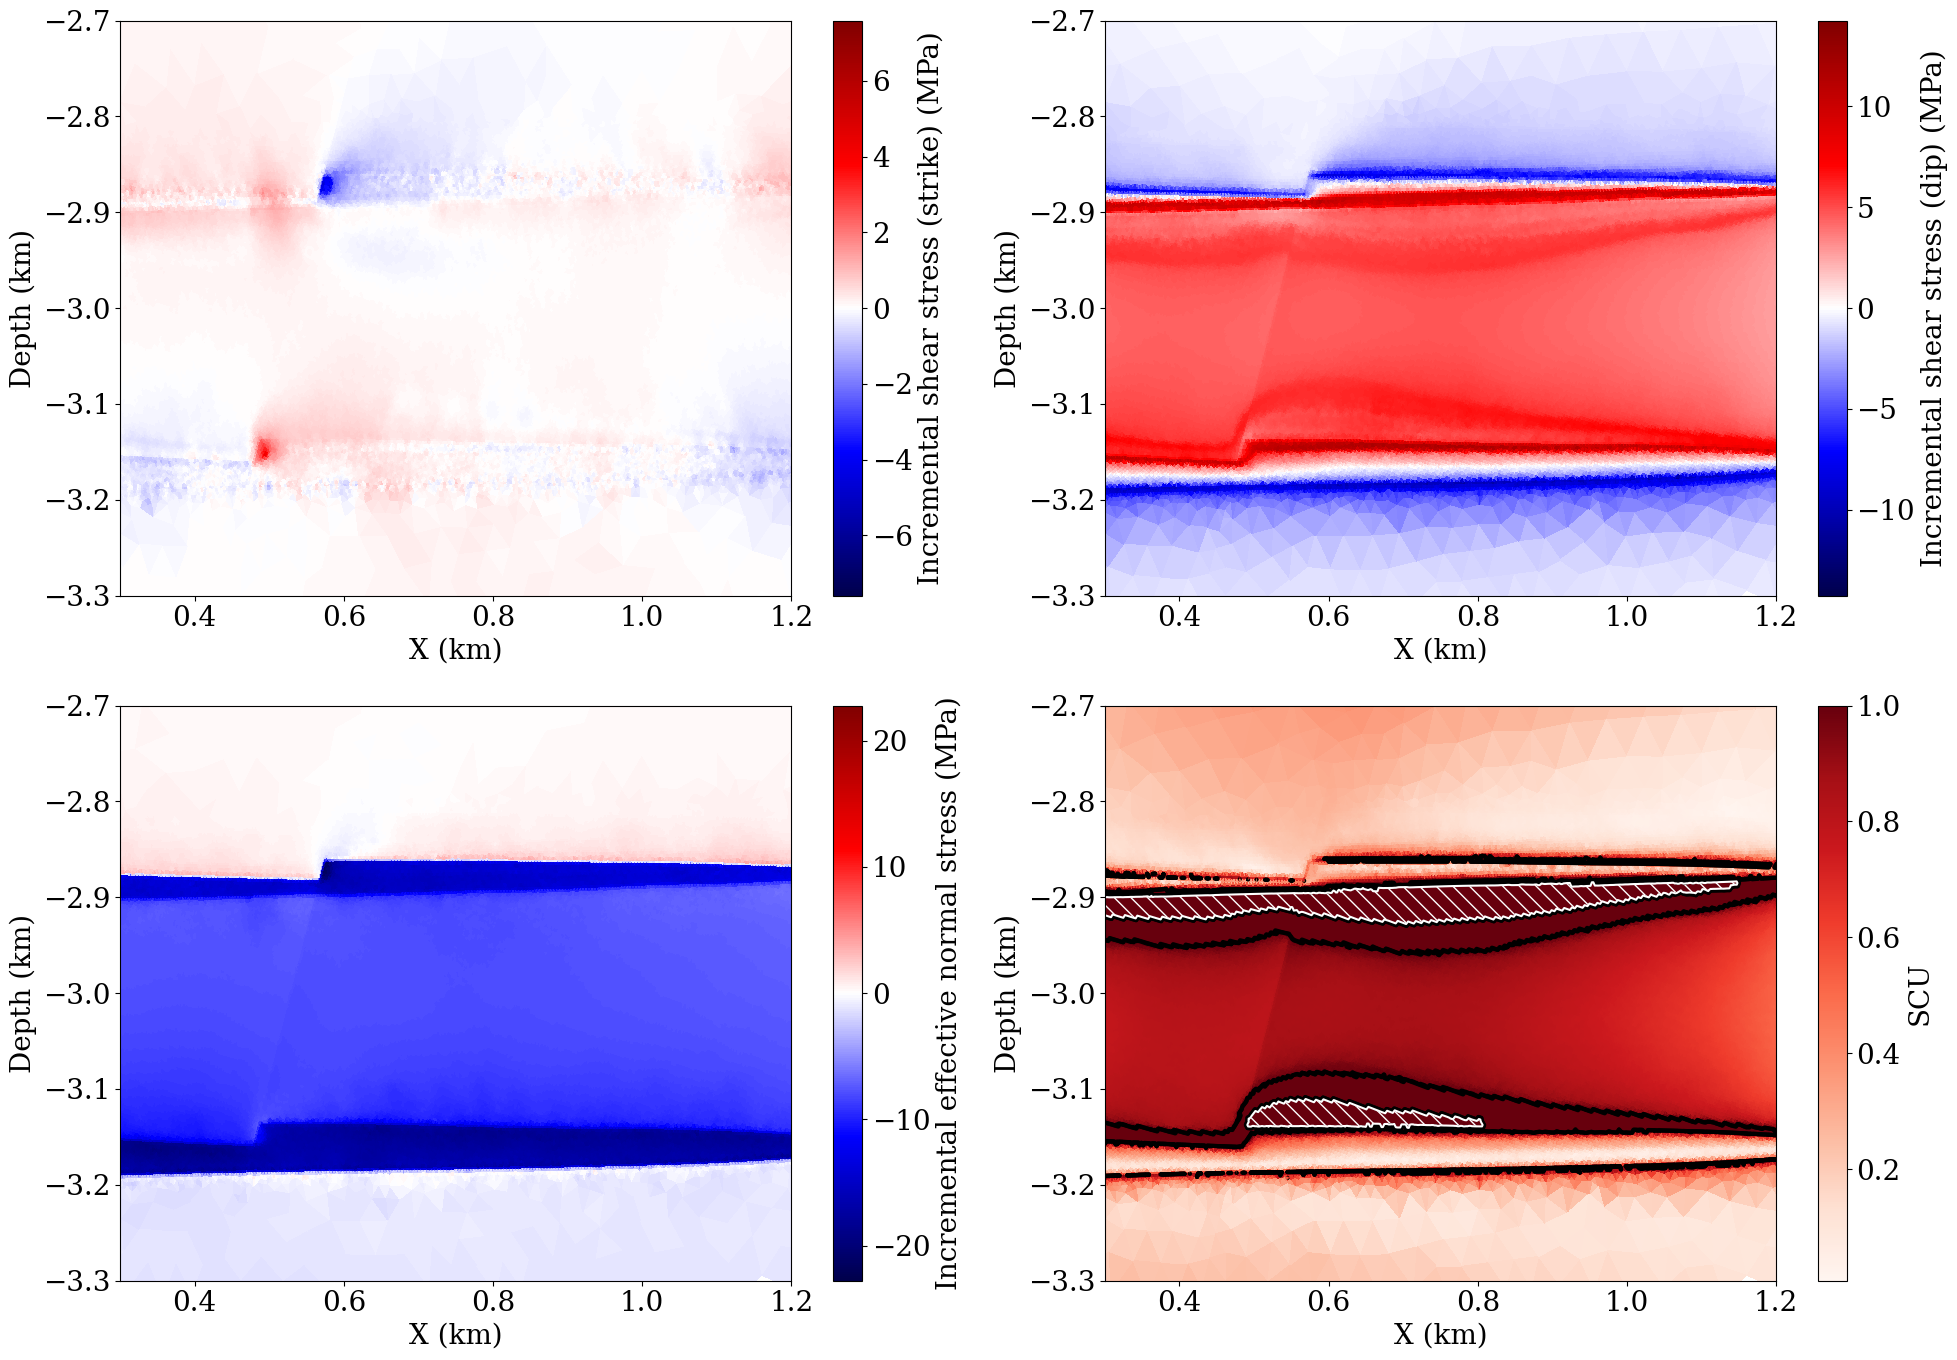

In [11]:
# new
Zeerijp.plot_induced_static_tri_group(filename=tri_file,tstep_list=[29],xyaxis=xyaxis,
                        delta=1,mask=0,edgecolor=0,xlim0=xlim0,xlim1=xlim1,zlim0=zlim0,zlim1=zlim1,interp=1)

# incremental 
# Zeerijp.plot_induced_static_tri_group(filename=tri_file,tstep_list=[28],xyaxis=xyaxis,
#                         delta=1,mask=0,edgecolor=0,xlim0=xlim0,xlim1=xlim1,interp=1)

plotting figure 0
26000000.000000037
plotting figure 1
26000000.000000037
plotting figure 2
26000000.000000037
plotting figure 3
26000000.000000037
completed weakening


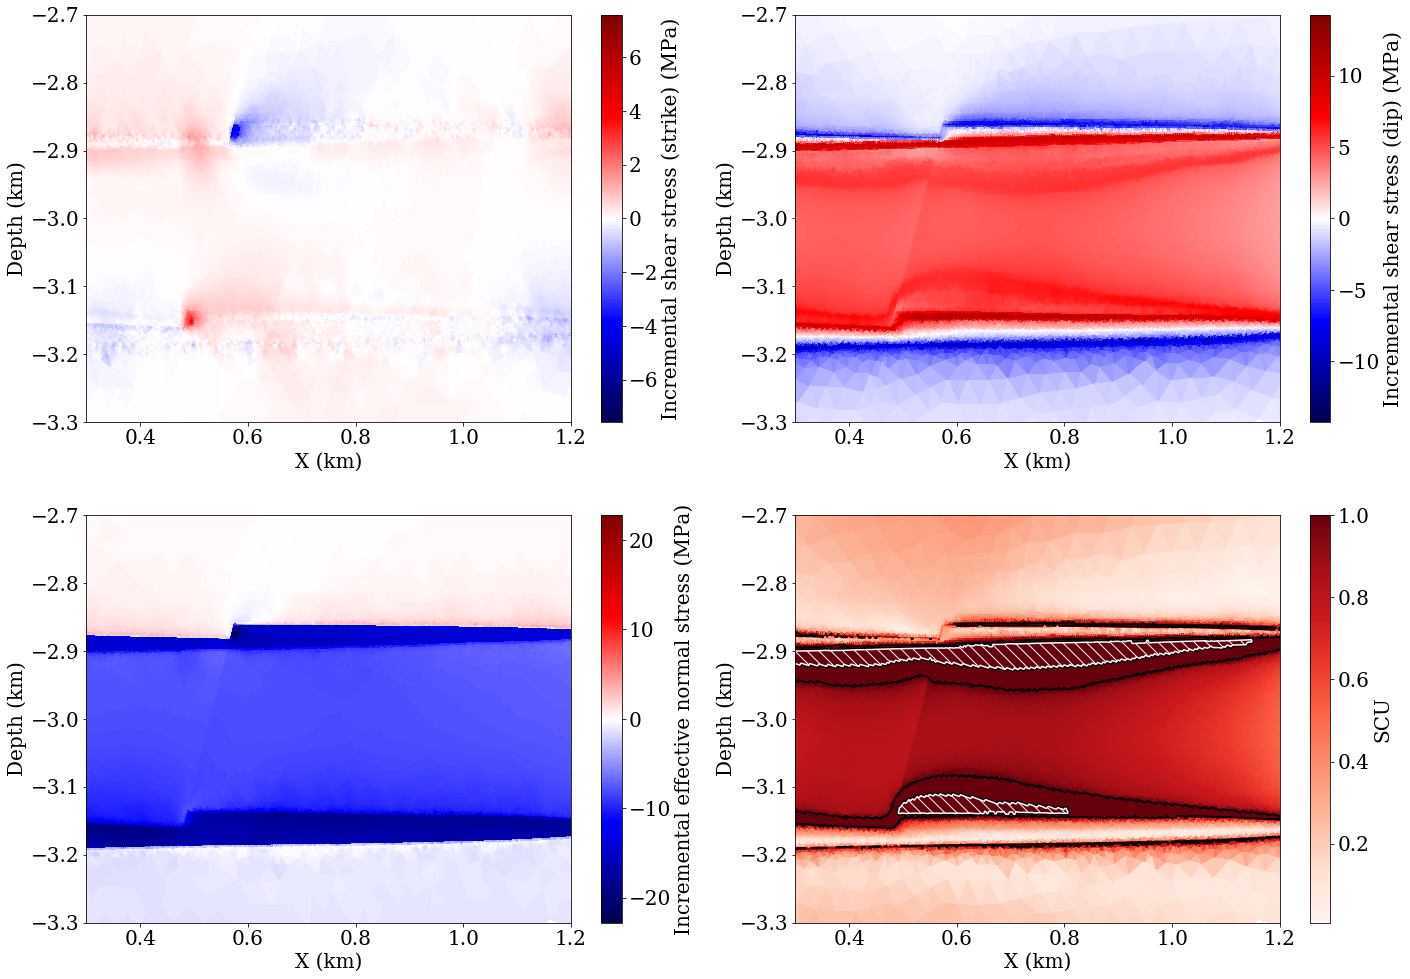

In [16]:
# new
Zeerijp.plot_induced_static_tri_group(filename=tri_file,tstep_list=[29],xyaxis=xyaxis,
                        delta=1,mask=0,edgecolor=0,xlim0=xlim0,xlim1=xlim1,zlim0=zlim0,zlim1=zlim1,interp=1)

# incremental 
# Zeerijp.plot_induced_static_tri_group(filename=tri_file,tstep_list=[28],xyaxis=xyaxis,
#                         delta=1,mask=0,edgecolor=0,xlim0=xlim0,xlim1=xlim1,interp=1)

plotting figure 0
26000000.000000037
plotting figure 1
26000000.000000037
plotting figure 2
26000000.000000037
plotting figure 3
26000000.000000037
completed weakening


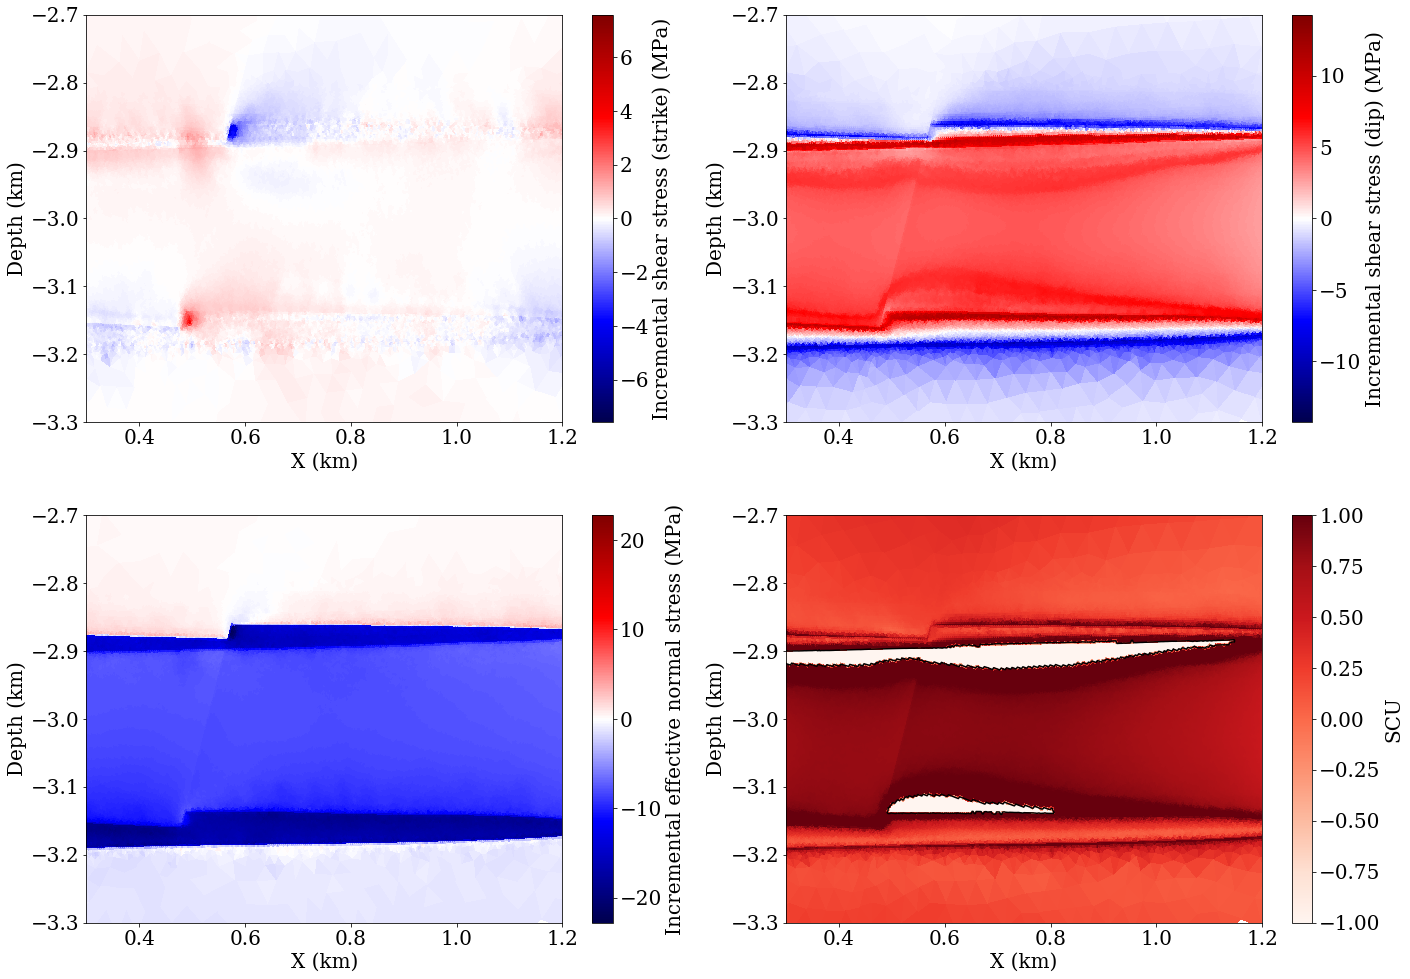

In [29]:
# incremental 
Zeerijp.plot_induced_static_tri_group(filename=tri_file,tstep_list=[29],xyaxis=xyaxis,
                        delta=1,mask=0,edgecolor=0,xlim0=xlim0,xlim1=xlim1,zlim0=zlim0,zlim1=zlim1,interp=1)

# incremental 
# Zeerijp.plot_induced_static_tri_group(filename=tri_file,tstep_list=[28],xyaxis=xyaxis,
#                         delta=1,mask=0,edgecolor=0,xlim0=xlim0,xlim1=xlim1,interp=1)

In [6]:
(np.log10(0.1*400*250*6.25*1e9)-9.1)*2/3

3.1305866782293834

In [7]:
# G = E/2/(1+nu)
15.0e9/2/(1+0.2)/1e9

6.25

In [20]:
# test plot slip ptach length
Zeerijp.getLnuc(step=29,xyaxis=0,vline=False,zlim0=False,zlim1=False,xlim0=False,xlim1=False,edgecolor=False)

not dead>>
1081 2.5077715399248364
dead >>
0 0.0
not dead>>
1083 2.512411265253097
dead >>
0 0.0
not dead>>
1199 2.78151533429221
dead >>
0 0.0
not dead>>
1921 4.456456177794275
dead >>
0 0.0
not dead>>
2309 5.356562891476824
dead >>
0 0.0
not dead>>
2599 6.029323064074607
dead >>
0 0.0
not dead>>
2834 6.574490790145224
dead >>
0 0.0
not dead>>
3105 7.20317357212453
dead >>
0 0.0
not dead>>
3380 7.841135804760359
dead >>
0 0.0
not dead>>
3663 8.497656938709229
dead >>
0 0.0
not dead>>
3952 9.16809724864288
dead >>
0 0.0
not dead>>
4246 9.850136871897183
dead >>
0 0.0
not dead>>
4523 10.492738829861272
dead >>
0 0.0
not dead>>
4796 11.12606133716884
dead >>
0 0.0
not dead>>
5102 11.835939312392707
dead >>
0 0.0
not dead>>
5382 12.485500858349186
dead >>
0 0.0
not dead>>
5675 13.165220618939358
dead >>
8 0.01855890131304227
not dead>>
5871 13.619913701108894
dead >>
128 0.2969424210086763
not dead>>
6077 14.097805409919733
dead >>
236 0.5474875887347469
not dead>>
6336 14.698649839929475

In [19]:
# test plot slip ptach length
Zeerijp.getLnuc(step=29,xyaxis=0,vline=False,zlim0=False,zlim1=False,xlim0=False,xlim1=False,edgecolor=False)

not dead>>
0 0.0
dead >>
0 0.0
not dead>>
1083 2.512411265253097
dead >>
0 0.0
not dead>>
1199 2.78151533429221
dead >>
0 0.0
not dead>>
1921 4.456456177794275
dead >>
0 0.0
not dead>>
2309 5.356562891476824
dead >>
0 0.0
not dead>>
2599 6.029323064074607
dead >>
0 0.0
not dead>>
2834 6.574490790145224
dead >>
0 0.0
not dead>>
3105 7.20317357212453
dead >>
0 0.0
not dead>>
3380 7.841135804760359
dead >>
0 0.0
not dead>>
3663 8.497656938709229
dead >>
0 0.0
not dead>>
3952 9.16809724864288
dead >>
0 0.0
not dead>>
4246 9.850136871897183
dead >>
0 0.0
not dead>>
4523 10.492738829861272
dead >>
0 0.0
not dead>>
4796 11.12606133716884
dead >>
0 0.0
not dead>>
5102 11.835939312392707
dead >>
0 0.0
not dead>>
5382 12.485500858349186
dead >>
0 0.0
not dead>>
5675 13.165220618939358
dead >>
8 0.01855890131304227
not dead>>
5871 13.619913701108894
dead >>
128 0.2969424210086763
not dead>>
6077 14.097805409919733
dead >>
236 0.5474875887347469
not dead>>
6336 14.698649839929475
dead >>
316 0.733

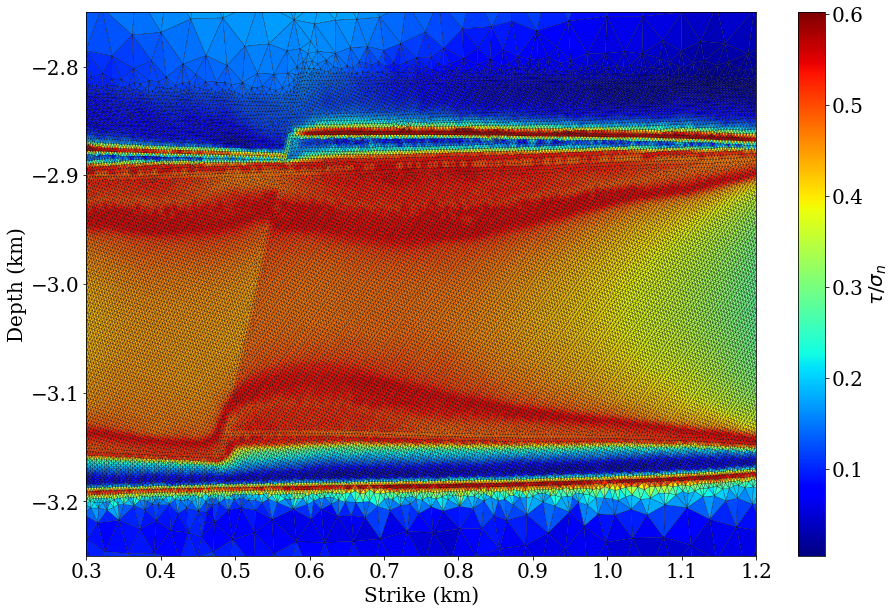

In [11]:
Zeerijp.plot_static_tri(filename=tri_file,tstep_list=[29],xyaxis=0,axis=4,
                        delta=1,mask=0,edgecolor=1,zlim0=zlim0+0.05,zlim1=zlim1-0.05,xlim0=xlim0,xlim1=xlim1+0.5)

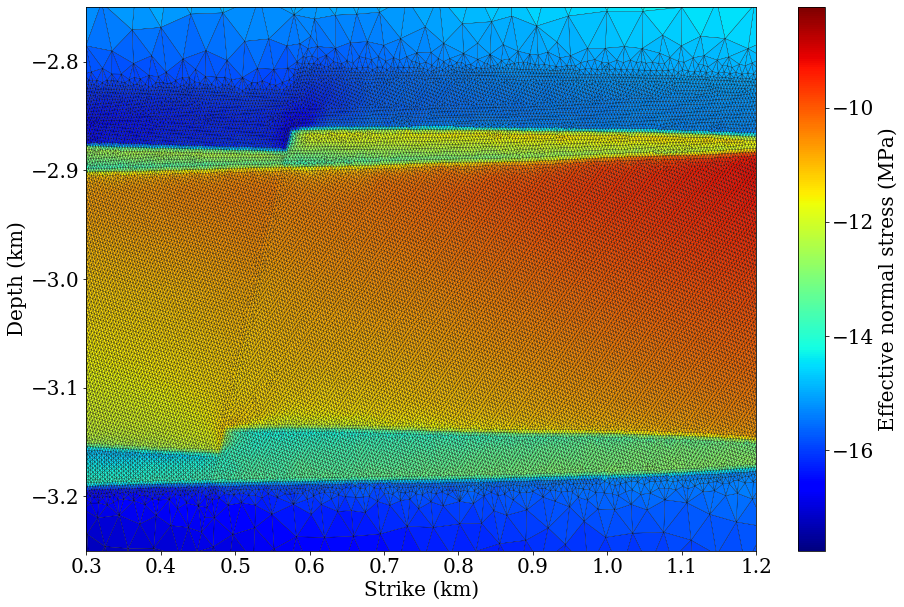

In [54]:
Zeerijp.plot_static_tri(filename=tri_file,tstep_list=[2],xyaxis=0,axis=2,
                        delta=0,mask=0,edgecolor=1,zlim0=zlim0+0.05,zlim1=zlim1-0.05,xlim0=xlim0,xlim1=xlim1+0.5)

# Plot dynamic

In [31]:
font = {'family' : 'serif',
        'size'   : 20}
plt.style.use('seaborn-pastel') 
matplotlib.rc('font', **font)
matplotlib.rc('image', cmap='Reds')
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

printing dynamic at step 29
(43106, 6, 145)
(43106, 3, 145)
(43106, 6, 145)
(43106, 3, 145)
(43106, 6, 145)
(43106, 3, 145)


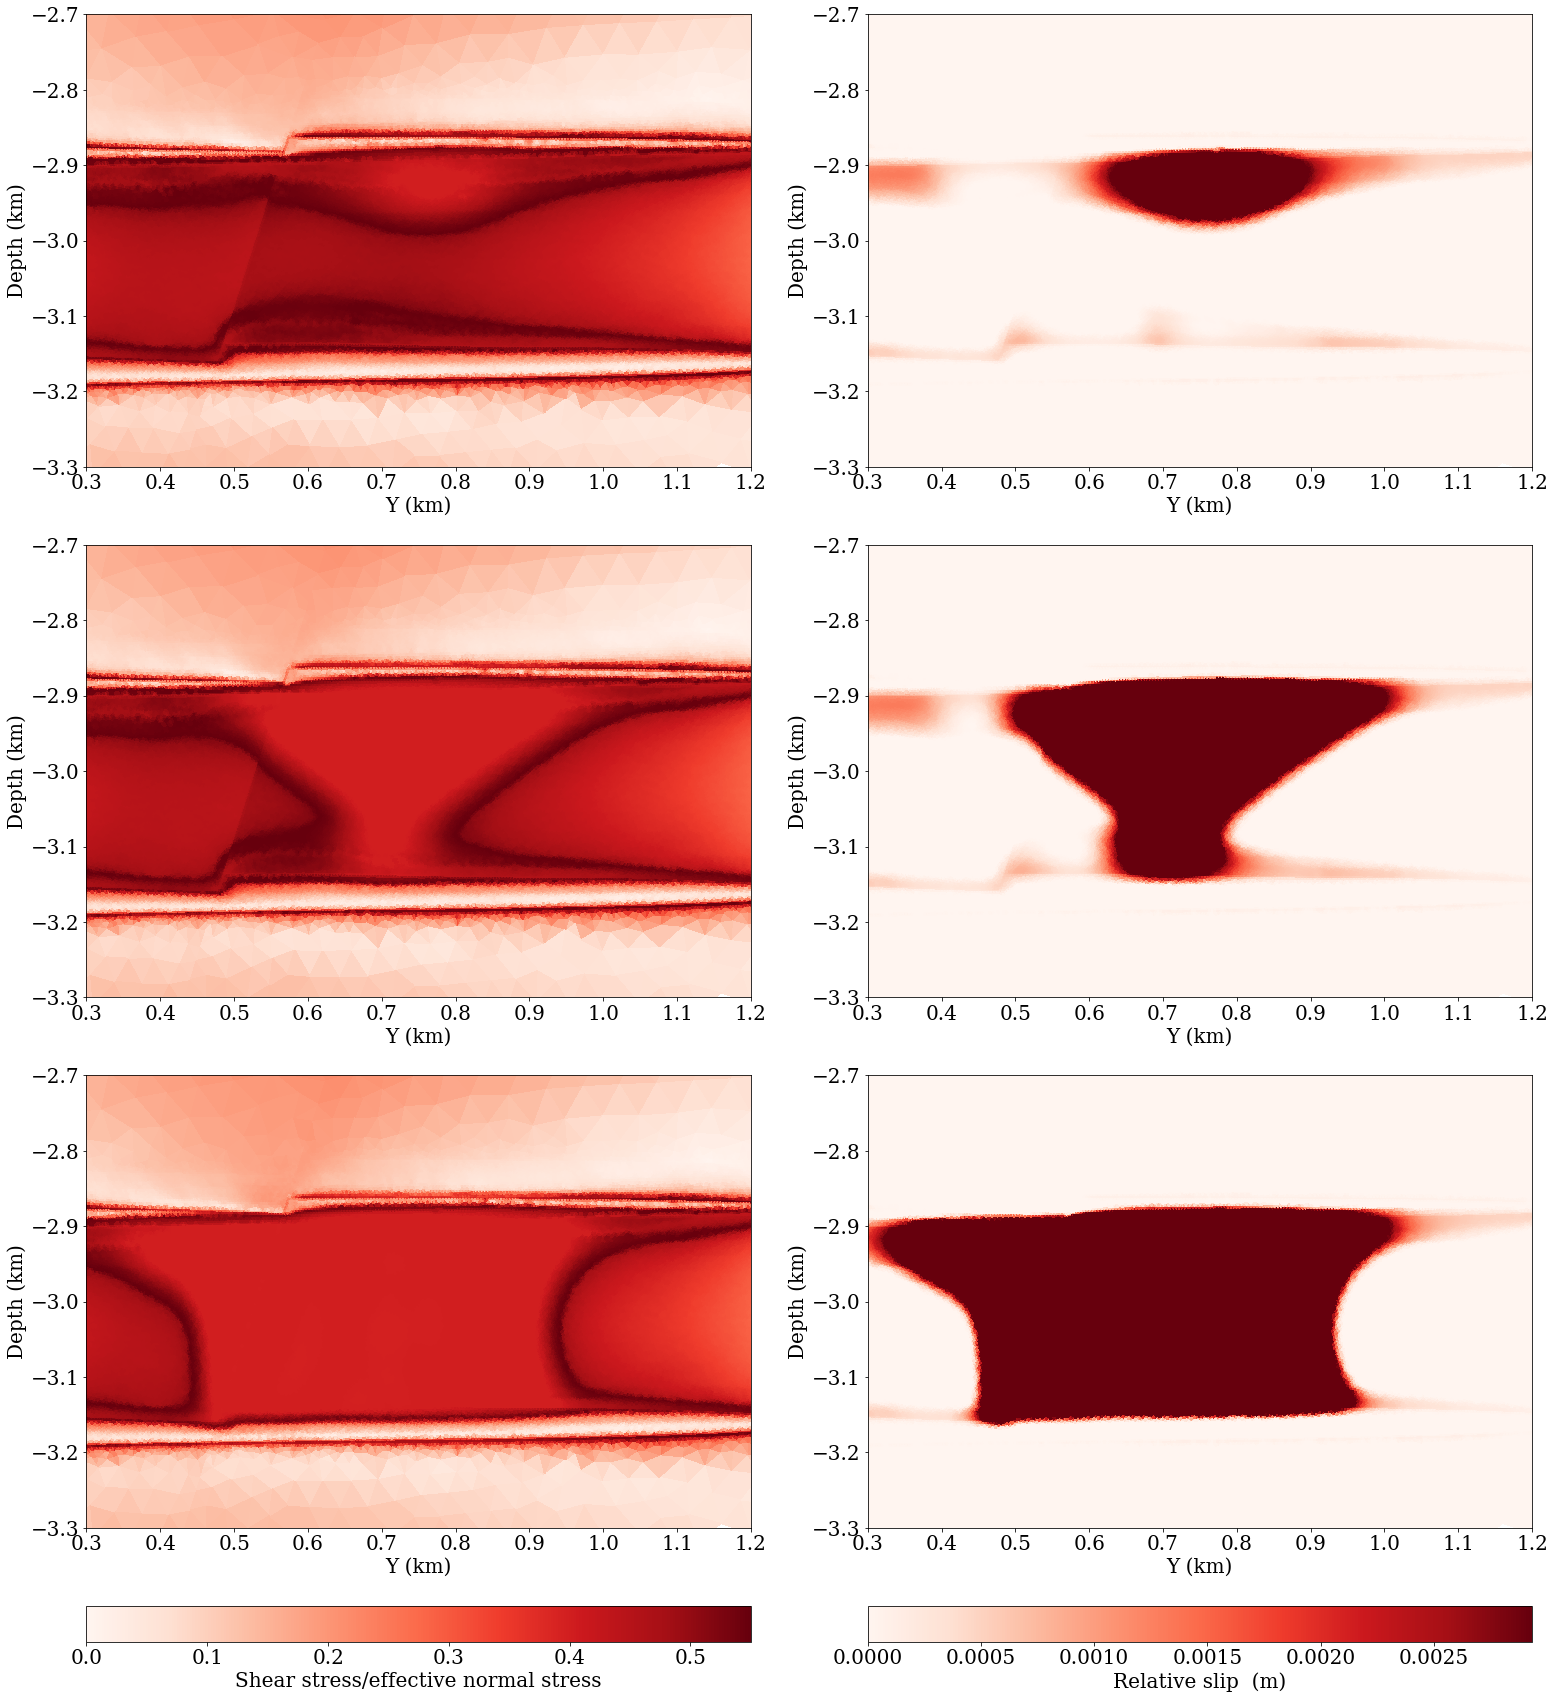

In [37]:
frame_list = [10,20,30]
Zeerijp.plot_dyn_slip_tri_group(tri_file_1=tri_file,frame_list=frame_list,step='step 29',axis=1,vabs=0,
                                mask=0,xyaxis=xyaxis,vline=False,xlim0=xlim0,xlim1=xlim1,zlim0=zlim0,zlim1=zlim1,
                                edgecolor=0)

(43106, 6, 155)
(43106, 3, 155)
(43106, 6, 155)
(43106, 3, 155)
(43106, 6, 155)
(43106, 3, 155)
(43106, 6, 155)
(43106, 3, 155)


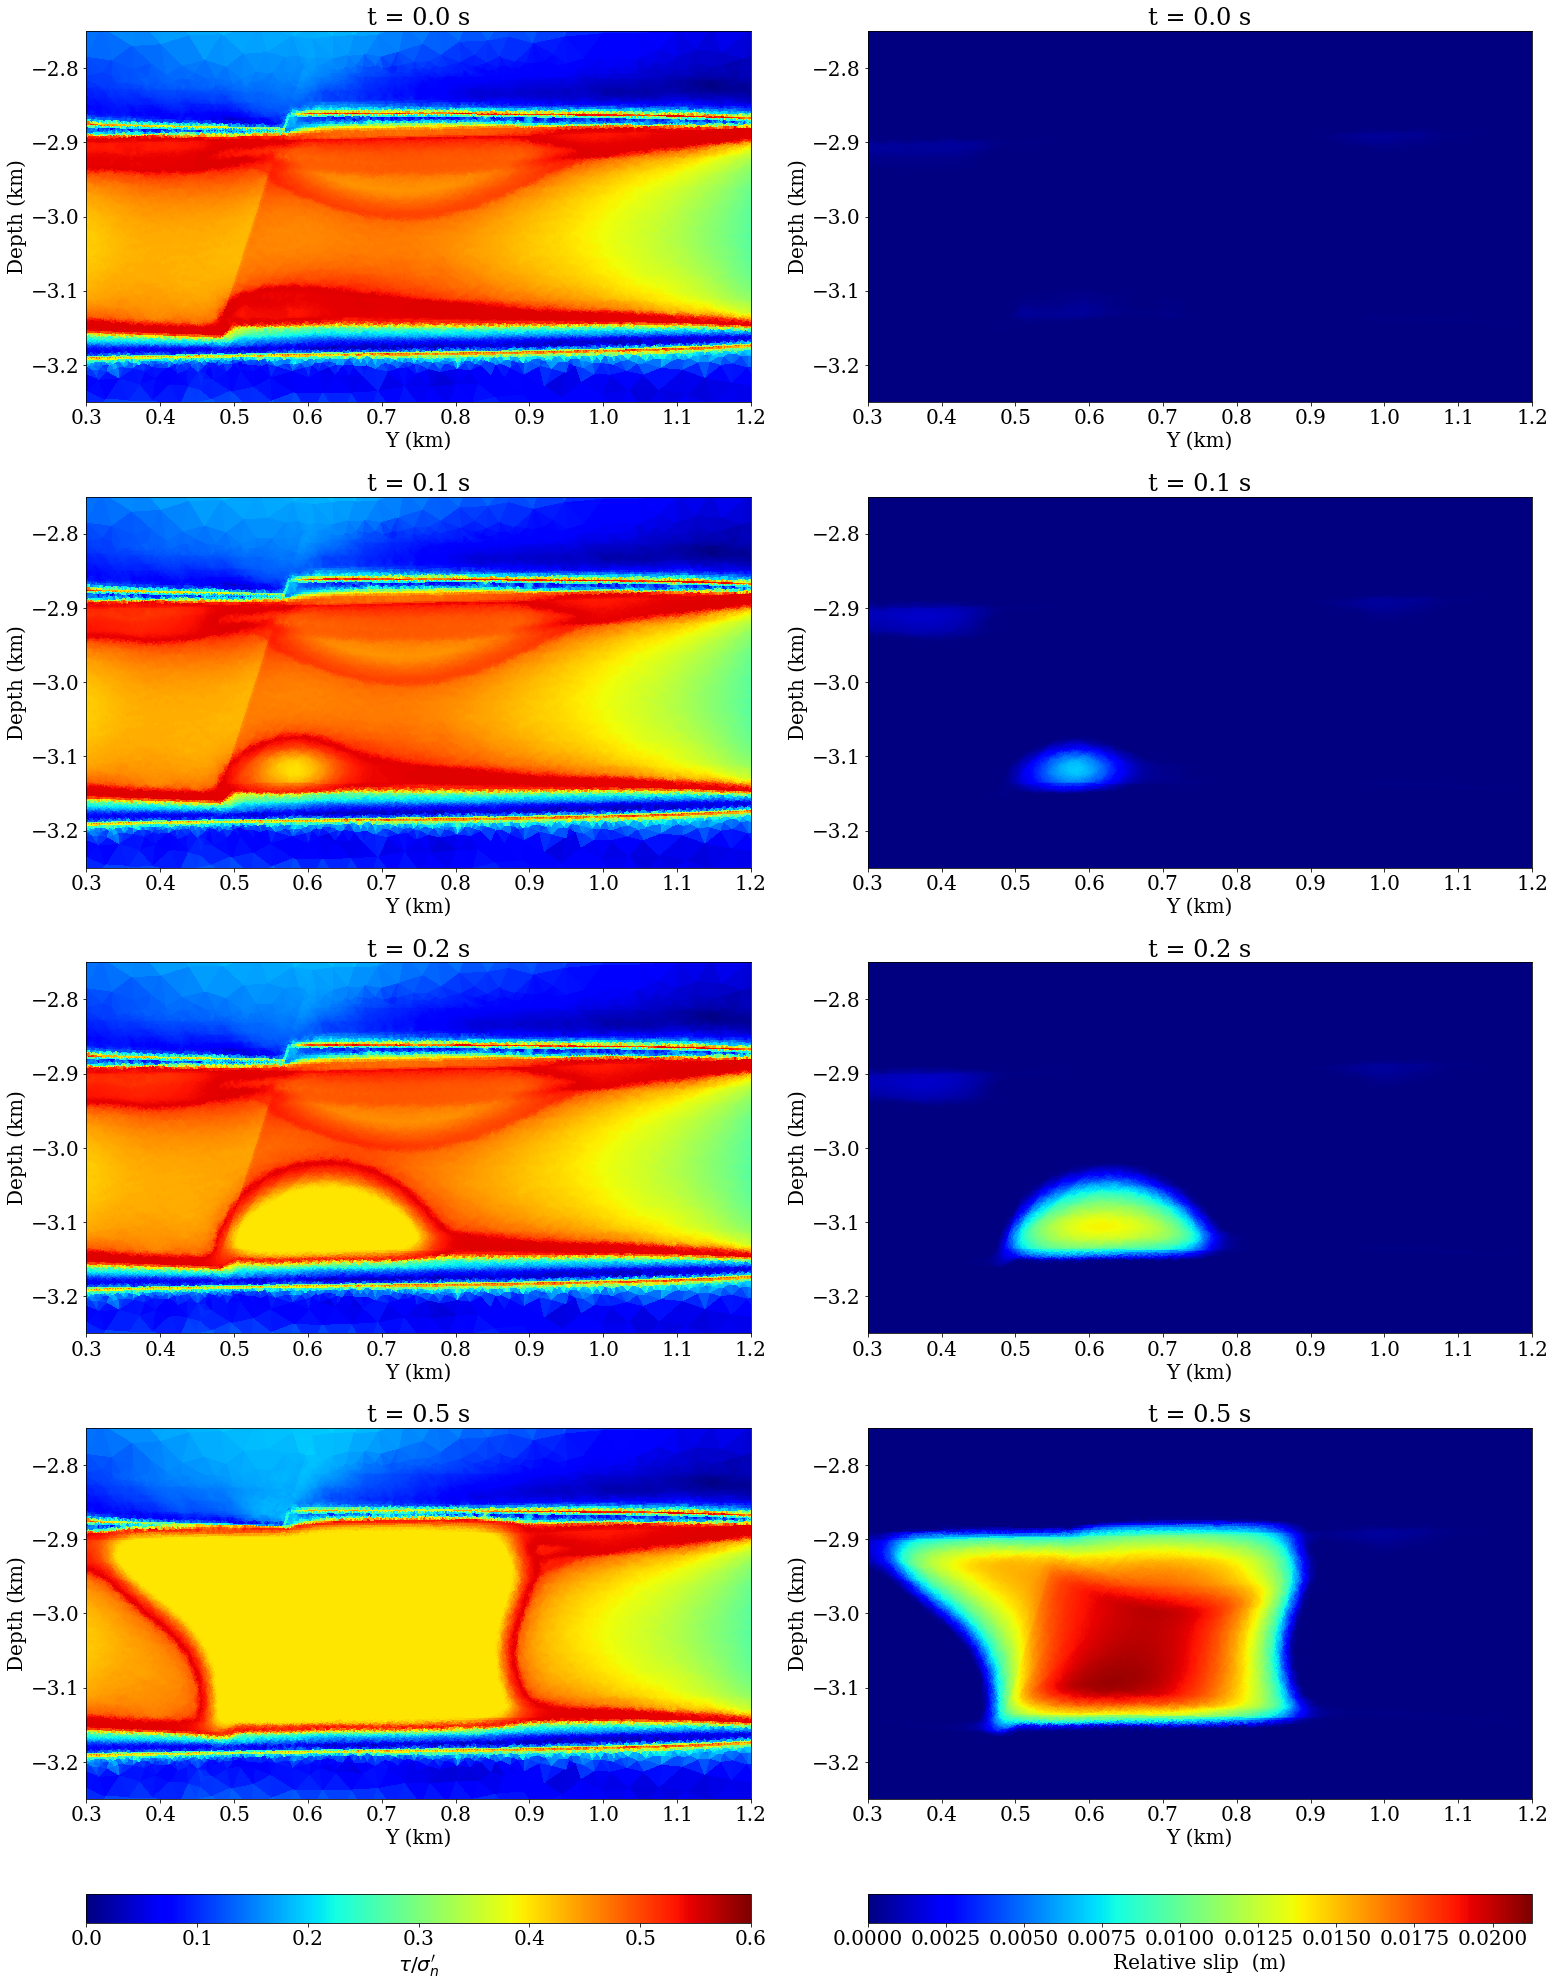

In [9]:
Zeerijp.plot_dyn_slip_tri_group(step='step 29',axis=1,vabs=0,
                                mask=0,xyaxis=xyaxis,vline=False,zlim0=zlim0+0.05,zlim1=zlim1-0.05,xlim0=xlim0,xlim1=xlim1+0.5,
                                edgecolor=0)

(43106, 6, 120)
(43106, 3, 120)
(43106, 6, 120)
(43106, 3, 120)
(43106, 6, 120)
(43106, 3, 120)
(43106, 6, 120)
(43106, 3, 120)


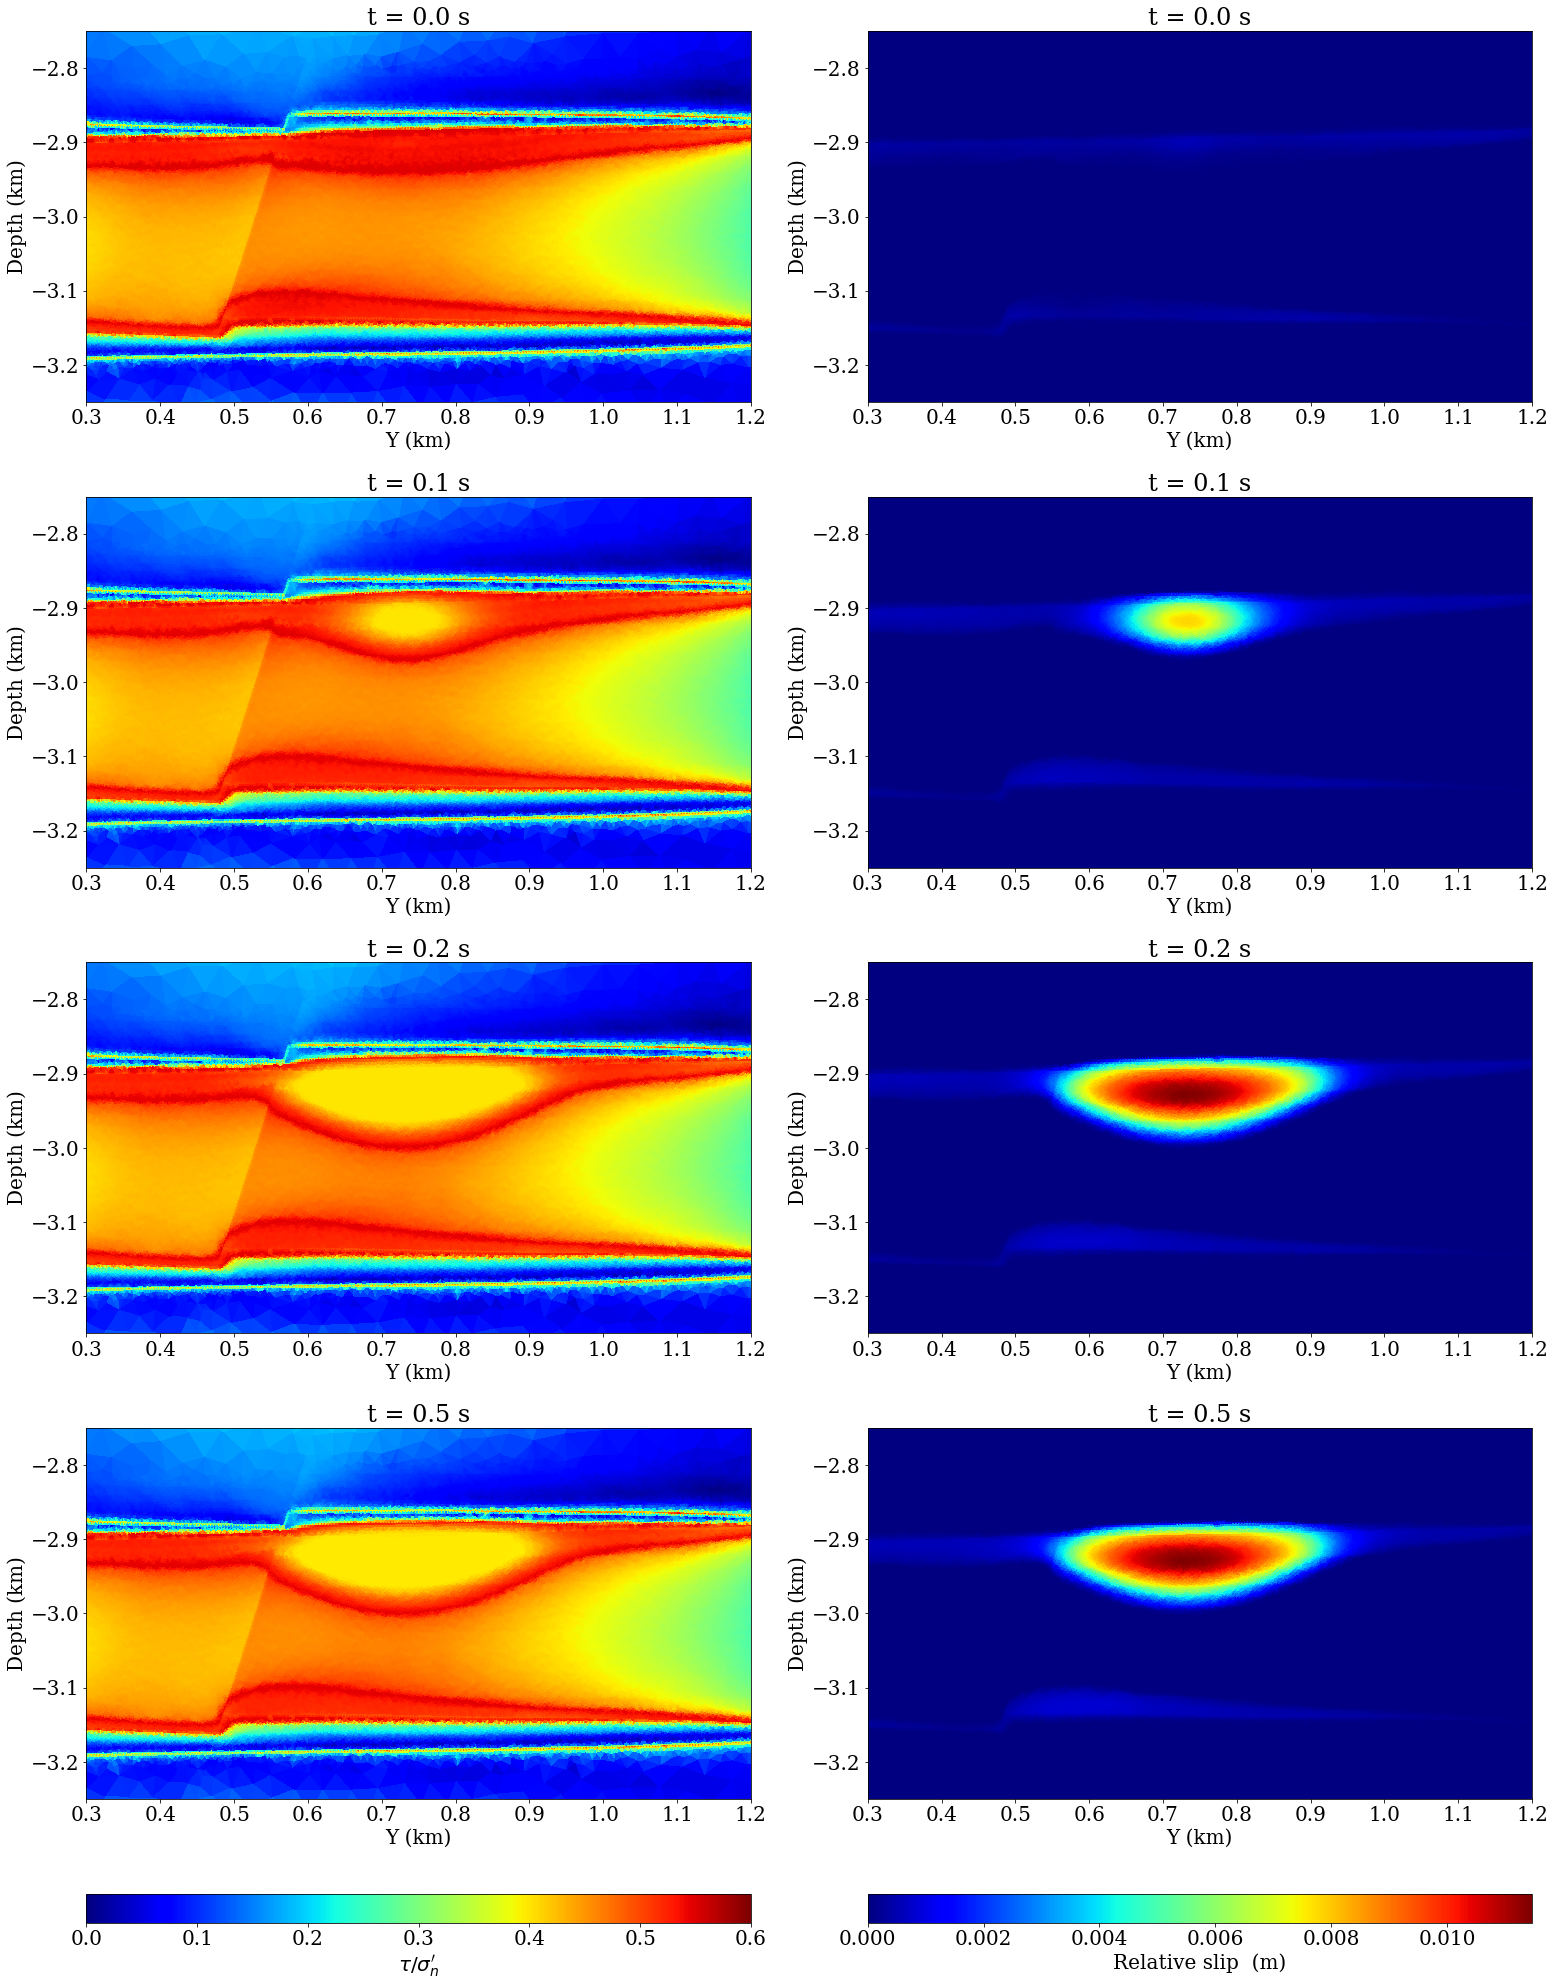

In [8]:
Zeerijp.plot_dyn_slip_tri_group(step='step 31',axis=1,vabs=0,
                                mask=0,xyaxis=xyaxis,vline=False,zlim0=zlim0+0.05,zlim1=zlim1-0.05,xlim0=xlim0,xlim1=xlim1+0.5,
                                edgecolor=0)